In [0]:
!pip install scikit-plot

import relevant packages

In [0]:
from __future__ import print_function
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json

from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import tensorflow as tf

import scikitplot as skplt
from sklearn import metrics

Using TensorFlow backend.


Using CUDA and GPU features of Google Colab

In [0]:
def use_gpu():
    """Configuration for GPU"""
    from keras.backend.tensorflow_backend import set_session
    os.environ['CUDA_VISIBLE_DEVICES'] = str(0)
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.9
    config.gpu_options.allow_growth = True
    sess = tf.compat.v1.InteractiveSession(config=config)
    sess.close()

use_gpu()

path for the essential files

In [0]:
path = "/content/drive/My Drive/Emotion-Recognition/"

x = np.load(path + 'fdataX.npy')
y = np.load(path + 'flabels.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

Split the dataset into the ratio = training set : validation set :  testing set in 80:10:10

In [0]:
# Split in  training set : validation set :  testing set in 80:10:10

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Our Proposed CNN Model: Deep CNN (DCNN) architecture and saved in .h5 file

In [0]:
batch_size = 128
epochs = 50
num_class = 7

#Main CNN model with four Convolution layer & two fully connected layer
def baseline_model():
    # Initialising the CNN
    model = Sequential()

    # 1 - Convolution
    model.add(Conv2D(64,(3,3), border_mode='same', input_shape=(48, 48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    # 2nd Convolution layer
    model.add(Conv2D(128,(5,5), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    # 3rd Convolution layer
    model.add(Conv2D(512,(3,3), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    # 4th Convolution layer
    model.add(Conv2D(512,(3,3), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))


    # Flattening
    model.add(Flatten())

    # Fully connected layer 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.45))

    # Fully connected layer 2nd layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.45))

    model.add(Dense(num_class, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# If model is not saved train the CNN model otherwise just load the weights

# Train model
model = baseline_model()
# Note : 3230 samples is used as validation data &   25,838 as training samples

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))

model_json = model.to_json()
with open(path + "Models/model_4layer_2_2_pool.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights(path + "Models/model_4layer_2_2_pool.h5")
print("Saved model to disk")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(48, 48, 1..., padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`


Train on 28709 samples, validate on 7178 samples
Epoch 1/50
28709/28709 [==============================] - 48s 2ms/step - loss: 0.4225 - accuracy: 0.8347 - val_loss: 0.3896 - val_accuracy: 0.8637
Epoch 2/50
28709/28709 [==============================] - 39s 1ms/step - loss: 0.3405 - accuracy: 0.8683 - val_loss: 0.3304 - val_accuracy: 0.8718
Epoch 3/50
28709/28709 [==============================] - 39s 1ms/step - loss: 0.3091 - accuracy: 0.8779 - val_loss: 0.2980 - val_accuracy: 0.8812
Epoch 4/50
28709/28709 [==============================] - 39s 1ms/step - loss: 0.2910 - accuracy: 0.8833 - val_loss: 0.2879 - val_accuracy: 0.8849
Epoch 5/50
28709/28709 [==============================] - 39s 1ms/step - loss: 0.2817 - accuracy: 0.8865 - val_loss: 0.2728 - val_accuracy: 0.8887
Epoch 6/50
28709/28709 [==============================] - 39s 1ms/step - loss: 0.2736 - accuracy: 0.8887 - val_loss: 0.2683 - val_accuracy: 0.8895
Epoch 7/50
28709/28709 [==============================] - 39s 1ms/ste

DCNN model summary

In [0]:
print (model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

Comparing Training loss and accuracy

Comparing Validation loss and Validation accuracy



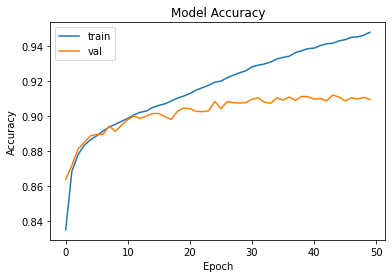

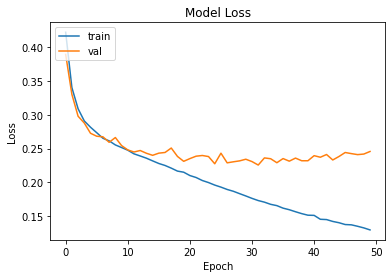

In [0]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Load Saved Model

In [0]:
def baseline_model_saved():
    #load json and create model
    json_file = open(path + 'Models/model_4layer_2_2_pool.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    
    #load weights from h5 file
    model.load_weights(path + "Models/model_4layer_2_2_pool.h5")
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = baseline_model_saved()

Testing Accuracy

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy on Test set: %.2f%%" % (scores[1]*100))

Accuracy on Test set: 90.95%



In X-axis and Y-axis--->

0-Anger, 1-Disgust, 2-Fear, 3-Happy, 4-Sad, 5-Surprise, 6-Neutral


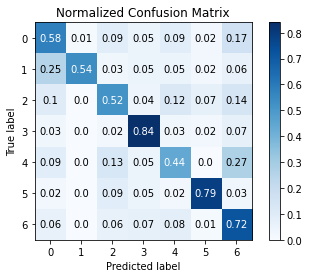

In [0]:
#Confusion Matrix
import scikitplot as skplt
from sklearn import metrics

print("\nIn X-axis and Y-axis--->")
print("\n0-Anger, 1-Disgust, 2-Fear, 3-Happy, 4-Sad, 5-Surprise, 6-Neutral")

score = model.predict(X_test)
new_X = [ np.argmax(item) for item in score ]
y_test2 = [ np.argmax(item) for item in y_test]

np.set_printoptions(precision=2)
skplt.metrics.plot_confusion_matrix(y_test2, new_X, normalize=True)
plt.savefig(path + "Images/Confusion-Matrix_deep.png")
plt.show()


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])


Test Loss: 0.2457614923692673
Test accuracy: 0.9095452427864075
(1, 48, 48, 1)
[[1.51e-02 6.45e-05 8.39e-03 9.45e-01 1.89e-04 7.26e-03 9.38e-04]]
[3]
[[0 0 0 1 0 0 0]]
